<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/Nhandienmonan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image

In [ ]:
#Link Train va test
train_path = '/content/drive/MyDrive/train/'

In [ ]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_img = []
labels = ['BanhMi','Banhcuon','Banhtrangnuong','BunBo','Bunthitnuong','Comtam','Goicuon','HuTieu','Miquang','Pho']
x_train = []
y_train = []
# Tao dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(300,300)) 
      img = img_to_array(img)
      img = img.reshape(300,300,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
  

In [ ]:
#Thiet Lap Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 720000)            0         
                                                                 
 dense_11 (Dense)            (None, 256)               184320256 
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 184,323,722
Trainable params: 184,323,722
Non-trainable params: 0
________________________________________

In [ ]:
#Complie Model 
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
#Training Model 
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
4/4 [==============================] - 2s 196ms/step - loss: 3.1827 - accuracy: 0.0700
Epoch 2/20
4/4 [==============================] - 2s 552ms/step - loss: 3.1478 - accuracy: 0.1700
Epoch 3/20
4/4 [==============================] - 3s 594ms/step - loss: 0.5527 - accuracy: 0.2300
Epoch 4/20
4/4 [==============================] - 1s 141ms/step - loss: 0.4017 - accuracy: 0.3300
Epoch 5/20
4/4 [==============================] - 1s 196ms/step - loss: 0.3398 - accuracy: 0.4300
Epoch 6/20
4/4 [==============================] - 1s 143ms/step - loss: 0.2881 - accuracy: 0.4300
Epoch 7/20
4/4 [==============================] - 1s 351ms/step - loss: 0.2590 - accuracy: 0.4500
Epoch 8/20
4/4 [==============================] - 1s 144ms/step - loss: 0.2108 - accuracy: 0.7700
Epoch 9/20
4/4 [==============================] - 1s 180ms/step - loss: 0.1812 - accuracy: 0.8400
Epoch 10/20
4/4 [==============================] - 1s 180ms/step - loss: 0.1555 - accuracy: 0.8100
Epoch 11/20
4/4 [==

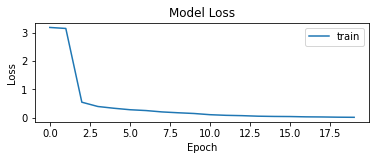

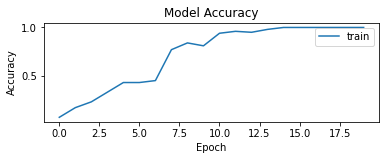

In [ ]:
#Ve Do thi Loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Ve Do thi Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

Day la Banhcuon


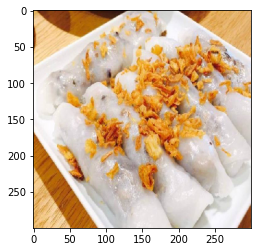

In [ ]:
img = image.load_img('17.jpg', target_size=(300,300)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3) 
img = img.astype('float32')
img = img/255
print('Day la '+ labels[np.argmax(model.predict(img))]) 

Day la Comtam


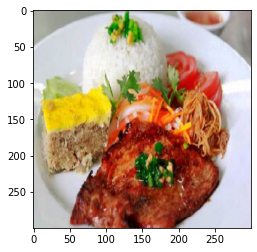

In [ ]:
img1 = image.load_img('97.jpg', target_size=(300,300)) 
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1,300,300,3) 
img1 = img1.astype('float32')
img1 = img1/255
print('Day la '+ labels[np.argmax(model.predict(img1))]) 

Day la Pho


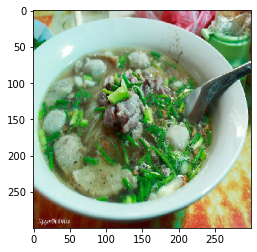

In [ ]:
img2 = image.load_img('10.jpg', target_size=(300,300)) 
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1,300,300,3) 
img2 = img2.astype('float32')
img2 = img2/255
print('Day la '+ labels[np.argmax(model.predict(img2))]) 